# CS 240 

## Homework 3 (Due Date 08.05.2018 23:59)

# Taj Saleh 

- Read NSFG respondent data with .ReadFemResp() function that provided by nsfg.py and create a dataframe then assign it a variable that called resp.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import nsfg
import brfss
import matplotlib
import thinkstats2
import thinkplot
import scipy



In [3]:
resp = nsfg.ReadFemResp()

In [4]:
# resp

- Find the mean and standart deviation for timesmar and jintendn variables from <b>resp</b> dataframe seperatly after drop the none values and inapplicable responds(1 pts).
- Plot Normalized Probability Density Functions for timesmar and jintendn variables from <b>resp</b> dataframe seperatly with using mean and standard deviation that you find above(1 pts).
- Explain the output of your results in a markdown cell(1 pts).

In [5]:
#  Applicable if R has ever been married (fmarit = 1, 2, 3, or 4)
# resp.fmarit
# resp[resp.fmarit <5 ].jintendn.dropna()


In [6]:

temp1 = resp[resp.fmarit <5 ].timesmar.dropna().std()
# temp1 = resp.timesmar.dropna().std()
temp1

4.297113023252983

In [9]:

temp2 = resp[resp.fmarit <5 ].jintendn.dropna().std()
# temp2 = resp.jintendn.dropna().std()
temp2

9.859218618451179

In [10]:
temp11 = resp[resp.fmarit <5 ].timesmar.dropna().mean()
temp11

1.387057682985943

In [11]:
temp22 = resp[resp.fmarit <5 ].jintendn.dropna().mean()
temp22

2.712290502793296

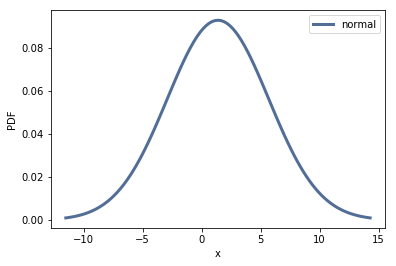

In [12]:
pdf = thinkstats2.NormalPdf(temp11, temp1)
pdf.Density(temp11 + temp1)
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

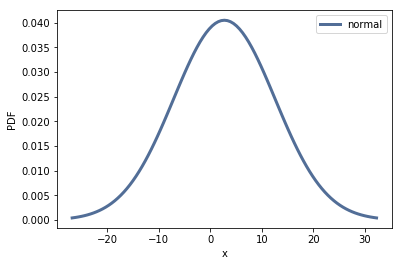

In [13]:
pdf = thinkstats2.NormalPdf(temp22, temp2)
pdf.Density(temp22 + temp2)
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [14]:
#the normal density function have 2 inputs (mean and std)
#Density, which takes a value, (mean + std in our case), and returns the density of the distribution at the value we gave.
# Pdf plots the probability density with a smooth curve.


- Plot Probability Density Functions for timesmar and jintendn variables from <b>resp</b> dataframe seperatly(1 pts).
- Then Find skewnesses and Pearson median skewness for timesmar and jintendn variables from <b>resp</b> dataframe seperatly(1 pts).
- Explain the output of your results in a markdown cell(1 pts).

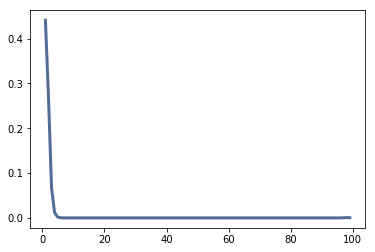

In [15]:

## Kernel density estimation that chooses the best PDF for a given sample

sample_pdf = thinkstats2.EstimatedPdf(resp.timesmar.dropna())
thinkplot.Pdf(sample_pdf, label='sample KDE 1')

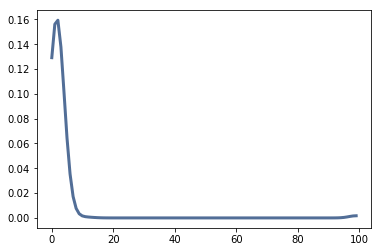

In [16]:

## Kernel density estimation that chooses the best PDF for a given sample

sample_pdf2 = thinkstats2.EstimatedPdf(resp.jintendn.dropna())
thinkplot.Pdf(sample_pdf2, label='sample KDE 2')


In [17]:
t  = resp.jintendn.dropna().skew()


import math 
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    
    return CentralMoment(xs, k) / std**k
def Skewness(xs):
    return StandardizedMoment(xs, 3)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

# print t 
print "skewness ",Skewness(resp.jintendn.dropna())
print "PearsonMedianSkewness ",PearsonMedianSkewness(resp.jintendn.dropna())

skewness  9.68691405793
PearsonMedianSkewness  0.527036842972


In [18]:
tt = resp.timesmar.dropna().skew()

print "skewness ",Skewness(resp.timesmar.dropna())
# print tt 
print "PearsonMedianSkewness ",PearsonMedianSkewness(resp.timesmar.dropna())


skewness  22.2193072207
PearsonMedianSkewness  0.27025442021


In [19]:
# i used Kernel density estimation that chooses the best PDF for a given sample
# Skewness is a property that describes the shape of a distribution
# Pearson’s median skewness is a measure of skewness based on the difference between the sample mean and median
# to find skewness i used multiple functions and same goes for pearson median skewness
# although scipy offers a function for skewness - skew() , i used noth and commented one of them :D

- Draw a Scatter plot with using timesmar and jintendn variables from <b>resp</b> dataframe and specify Jitter(Use alpha=0.01, s=2)-->(1 pts).
- Plot Percentiles with using timesmar and jintendn variables from <b>resp</b> dataframe(Use Colors = ["black","blue","yellow"], Percent = [25, 50, 75])-->(1 pts).
- Explain the output of your results in a markdown cell(1 pts).

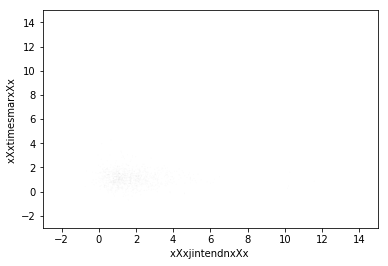

In [44]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values
# cleaned = resp.dropna(subset=['timesmar', 'jintendn'])

jintendn = Jitter(resp.jintendn)
timesmar = Jitter(resp.timesmar)




thinkplot.Scatter(jintendn, timesmar, alpha=0.01,s=2,color='black')
thinkplot.Config(xlabel='xXxjintendnxXx ',
                 ylabel='xXxtimesmarxXx ',
                axis=[-3, 15, -3, 15],
                 legend=False)



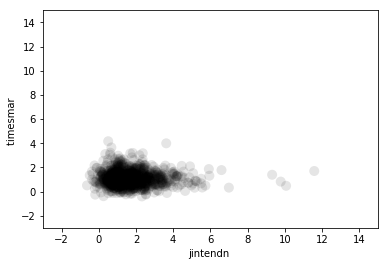

In [45]:
### this one to prove that it has outputs in the plot but the values that is asked to be used  are small.
## above plot is what thr questioned asked us to do

cleaned = resp.dropna(subset=['timesmar', 'jintendn'])

jintendn = Jitter(resp.jintendn)
timesmar = Jitter(resp.timesmar)
thinkplot.Scatter(jintendn, timesmar, alpha=0.1,s=100,color='black')
thinkplot.Config(xlabel='jintendn ',
                 ylabel='timesmar ',
                 axis=[-3, 15, -3, 15],
                 legend=False)

In [34]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
bins = np.arange(1, 100, 1)
print(bins)
indices = np.digitize(cleaned.timesmar, bins)
print(indices)
groups = cleaned.groupby(indices)
print(groups)
print "# ##################"
for i, group in groups:
    print(i, len(group))
print "# ##################"
mean_heights = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]
print mean_heights
print "# ##################"


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[1 1 2 ..., 1 1 2]
# ##################
(1L, 992)
(2L, 73)
(3L, 7)
(4L, 2)
# ##################
[1.0, 2.0, 3.0, 4.0]
# ##################


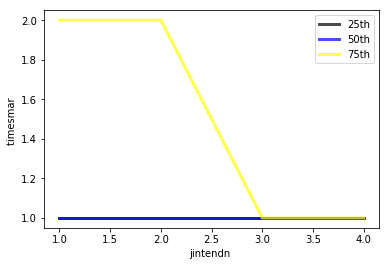

In [55]:
CustomColors = ["black","blue","yellow"]
percent = [25, 50, 75]
for i in range(len(percent)):
    weight_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_heights, weight_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(
                 xlabel='jintendn ',
                 ylabel='timesmar ',
#                  axis=[0, 5, 0, 5],
                 legend=True)

In [36]:
# first 
# ploted the data after jittering using alpha =0.01 and s =2

In [37]:
# second 
# i divided the dataset into groups by value label
# then i showed the number of respondents in each group
# then i computed the CDF of weight within each group
# And then i extracted the 25th, 50th, and 75th percentile from each group.
# i plotted them 



In [38]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
jintendn = Jitter(resp.jintendn)
timesmar = Jitter(resp.timesmar)


t = scipy.stats.pearsonr(jintendn, timesmar)
print t 

(nan, 1.0)


C:\Users\tajothman\AppData\Roaming\Python\Python27\site-packages\scipy\stats\stats.py:3012: RuntimeWarning: invalid value encountered in double_scalars
  t_squared = r**2 * (df / ((1.0 - r) * (1.0 + r)))
C:\Users\tajothman\AppData\Roaming\Python\Python27\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [39]:
t = scipy.stats.spearmanr(jintendn,timesmar)
print t 

SpearmanrResult(correlation=nan, pvalue=nan)


Pearson correlation:
The Pearson correlation evaluates the linear relationship between two continuous variables. 
A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

Spearman correlation:
The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. 
Spearman correlation is often used to evaluate relationships involving ordinal variables.

- Find Pearson Correlation and Spearman Correlation of timesmar and jintendn variables from <b>resp</b> dataframe with using Scipy Module(1 pts).
- Explain the difference bewteen Pearson Correlation and Spearman Correlation in a markdown cell according the results that you find above(1 pts).
- Comment about timesmar and jintendn variables from <b>resp</b> dataframe based on all your works done above(2 pts).

In [47]:
# :D

- References
- - timesmar variable from resp dataframe -> https://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=C&subSec=7825&srtLabel=604722# <br/>
- - timesmar variable from jintendn dataframe -> https://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=G&subSec=7852&srtLabel=606634#  <br/>
- - Pearson and Spearman Correlation functions from Scipy -> https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html 

##### Note that: Total of points is 13 but maximum points that can be get 10 points (3 points bonus). Do not forget the give the name to your visuals labels(visuals's label, x-axis and y-axis label). Your answers/codes must be uploaded to your github accounts inside a folder that called Homework3_YourNameSurname. The due date is the end of the next Tuesday(08.05.2018 23:59).<u> And you have to send me link of your github account via email again</u>.

##### The Office Hour is 03.05.2018 Thursday between 16:00 - 18:00

## ANY LATE UPLOAD TO GITHUB EVEN INCLUDING 1 MINUTE WILL NOT BE ACCEPTED AND HOMEWORKS HAVE TO BE UPLOADED TO ONLY GITHUB. JUST SEND ME YOUR GITHUB ACCOUNT LINK VIA EMAIL. FOR OTHER OPTIONS YOU HAVE TO TALK WITH ME.